# 지구과학에서의 날씨 인공지능

### Matplotlib에서 폰트 설정

In [1]:
import urllib
from matplotlib import font_manager
from matplotlib import pyplot as plt

font_path = 'NanumGothic.ttf'
with open(font_path, 'wb') as f: 
    f.write(urllib.request.urlopen("https://github.com/team-monolith-product/jupyter-nanum/raw/main/NanumGothic.ttf").read())

# 글꼴을 등록합니다.
font_manager.fontManager.addfont(font_path)
plt.rcParams['font.family'] = font_manager.FontProperties(fname=font_path).get_name()

### [Step1] 데이터 로드

In [2]:
import pandas as pd

df = pd.read_csv('datasets/날씨.csv')
df = df[:50000]
df

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,04.08.2011 04:30:00,987.98,16.50,290.66,16.26,98.5,18.80,18.52,0.28,11.74,18.74,1179.78,1.14,1.56,207.1
49996,04.08.2011 04:40:00,988.01,16.51,290.67,16.27,98.5,18.81,18.53,0.28,11.75,18.75,1179.77,0.53,1.34,196.1
49997,04.08.2011 04:50:00,988.03,16.56,290.72,16.34,98.6,18.87,18.61,0.26,11.80,18.83,1179.55,0.43,0.98,179.6
49998,04.08.2011 05:00:00,988.07,16.57,290.73,16.35,98.6,18.88,18.62,0.26,11.81,18.84,1179.55,0.62,1.08,189.3


### [Step2] 데이터 파악하기

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date Time        50000 non-null  object 
 1   p (mbar)         50000 non-null  float64
 2   T (degC)         50000 non-null  float64
 3   Tpot (K)         50000 non-null  float64
 4   Tdew (degC)      50000 non-null  float64
 5   rh (%)           50000 non-null  float64
 6   VPmax (mbar)     50000 non-null  float64
 7   VPact (mbar)     50000 non-null  float64
 8   VPdef (mbar)     50000 non-null  float64
 9   sh (g/kg)        50000 non-null  float64
 10  H2OC (mmol/mol)  50000 non-null  float64
 11  rho (g/m**3)     50000 non-null  float64
 12  wv (m/s)         50000 non-null  float64
 13  max. wv (m/s)    50000 non-null  float64
 14  wd (deg)         50000 non-null  float64
dtypes: float64(14), object(1)
memory usage: 5.7+ MB


In [4]:
df.describe()

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,989.221120,9.250277,283.290264,4.704719,75.667994,13.526574,9.421801,4.104671,5.949928,9.524425,1217.047344,2.108510,3.509134,172.927571
std,7.864849,8.692661,8.738978,6.952892,16.150280,8.078200,4.221118,5.165652,2.673838,4.264543,40.624770,1.536897,2.315862,87.848085
min,960.370000,-20.790000,251.910000,-22.810000,23.770000,1.160000,0.970000,0.000000,0.600000,0.960000,1104.990000,0.000000,0.000000,0.000000
25%,984.680000,2.930000,276.980000,-0.470000,65.790000,7.540000,5.900000,0.930000,3.720000,5.970000,1189.040000,0.960000,1.750000,114.900000
50%,989.280000,9.270000,283.260000,5.150000,79.100000,11.700000,8.820000,2.140000,5.580000,8.940000,1214.680000,1.760000,3.000000,194.200000
75%,994.150000,15.350000,289.370000,10.020000,88.700000,17.470000,12.310000,5.070000,7.770000,12.440000,1244.280000,2.840000,4.740000,234.900000
max,1010.700000,37.280000,311.210000,19.390000,100.000000,63.770000,22.550000,46.010000,14.280000,22.760000,1388.750000,14.090000,20.780000,360.000000


### [Step3] 데이터 시각화하기

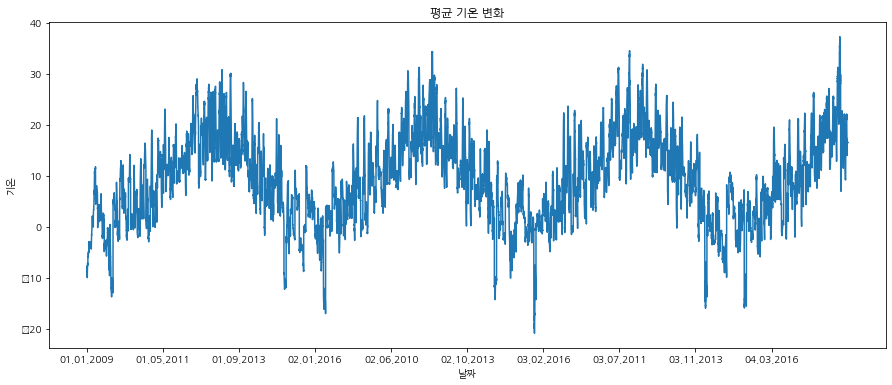

In [5]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (15,6)) # 그래프의 크기를 15,6으로 설정합니다.

plt.plot(df['T (degC)'])
plt.xticks(range(0, len(df), len(df)//10), labels = [df.iloc[x,0][:10] for x in range(0, len(df), len(df)//10)]) # x축에 표시되는 값을 설정합니다.
plt.title('평균 기온 변화')
plt.xlabel('날짜')
plt.ylabel('기온')
plt.show()

### [Step4] 데이터 형태 변형하기

In [6]:
import numpy as np

data = None
for i in range(12):# 12일의 연속되는 데이터를 묶어줍니다.
    tmp = np.array(df['T (degC)'].iloc[i:-(12-i)]).reshape(-1,1) # i 번째 데이터를 만듭니다.
    if data is None:
        data = tmp
    else:
        data = np.concatenate((data,tmp), axis = 1) # i 번째 데이터를 합칩니다.
        
data

array([[-8.02, -8.41, -8.51, ..., -8.43, -8.76, -8.88],
       [-8.41, -8.51, -8.31, ..., -8.76, -8.88, -8.85],
       [-8.51, -8.31, -8.27, ..., -8.88, -8.85, -8.83],
       ...,
       [16.66, 16.6 , 16.5 , ..., 16.53, 16.5 , 16.51],
       [16.6 , 16.5 , 16.5 , ..., 16.5 , 16.51, 16.56],
       [16.5 , 16.5 , 16.6 , ..., 16.51, 16.56, 16.57]])

### [Step5] 데이터를 학습데이터와 검증데이터로 나누기

In [7]:
train ,test = data[:int(len(data)*0.8)], data[int(len(data)*0.8):] # Dataset을 학습데이터와 테스트데이터로 나눕니다.
train_x, train_y = train[:,:6],train[:,6:] # Data를 label과 input으로 나눕니다.
test_x, test_y = test[:,:6],test[:,6:] # Data를 label과 input으로 나눕니다.

train_x = train_x.reshape(-1,6,1) # Data를 모델에 들어가는 형태로 바꿉니다.
train_y = train_y.reshape(-1,6,1) # Data를 모델에 들어가는 형태로 바꿉니다.
test_x = test_x.reshape(-1,6,1) # Data를 모델에 들어가는 형태로 바꿉니다.
test_y = test_y.reshape(-1,6,1) # Data를 모델에 들어가는 형태로 바꿉니다.

print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(39990, 6, 1) (9998, 6, 1) (39990, 6, 1) (9998, 6, 1)


### [Step6] 모델 구성하기

In [8]:
from tensorflow import keras

# keras를 사용해 모델을 구성합니다.
model = keras.Sequential([
    keras.layers.Bidirectional(keras.layers.LSTM(64, return_sequences=True)),
    keras.layers.Dense(32),
    keras.layers.Dense(1),
])


model.compile(optimizer="adam", metrics=["mse"], loss="mae") # 학습방법을 세팅합니다.

model.build(train_x.shape)
model.summary() # 모델의 정보를 보여줍니다.

2022-06-24 07:02:58.196116: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (39990, 6, 128)          33792     
 l)                                                              
                                                                 
 dense (Dense)               (39990, 6, 32)            4128      
                                                                 
 dense_1 (Dense)             (39990, 6, 1)             33        
                                                                 
Total params: 37,953
Trainable params: 37,953
Non-trainable params: 0
_________________________________________________________________


### [Step7] 모델 학습하기

In [9]:
# early_stop을 설정합니다.
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

# 모델을 학습 시킵니다.
history = model.fit(train_x, train_y, epochs=10,
                    validation_data=(test_x, test_y), 
                    callbacks=[early_stop])

Epoch 1/10
1250/1250 [==============================] - 22s 14ms/step - loss: 1.0092 - mse: 4.3795 - val_loss: 0.6368 - val_mse: 2.1178
Epoch 2/10
1250/1250 [==============================] - 17s 14ms/step - loss: 0.5947 - mse: 1.4405 - val_loss: 0.6251 - val_mse: 2.0525
Epoch 3/10
1250/1250 [==============================] - 17s 13ms/step - loss: 0.5702 - mse: 1.3794 - val_loss: 0.5855 - val_mse: 1.9527
Epoch 4/10
1250/1250 [==============================] - 17s 13ms/step - loss: 0.5587 - mse: 1.3424 - val_loss: 0.5682 - val_mse: 1.8796
Epoch 5/10
1250/1250 [==============================] - 17s 14ms/step - loss: 0.5416 - mse: 1.3172 - val_loss: 0.5682 - val_mse: 1.8391
Epoch 6/10
1250/1250 [==============================] - 17s 14ms/step - loss: 0.5475 - mse: 1.3120 - val_loss: 0.5572 - val_mse: 1.7855
Epoch 7/10
1250/1250 [==============================] - 17s 13ms/step - loss: 0.5346 - mse: 1.2957 - val_loss: 0.5515 - val_mse: 1.7990
Epoch 8/10
1250/1250 [==========================

### [Step8] 학습결과 시각화하기

2022-06-24 07:05:56.594244: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 122849280 exceeds 10% of free system memory.


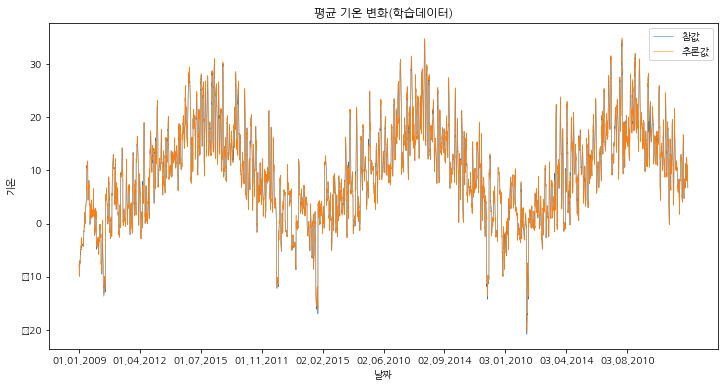

In [10]:
# 학습데이터의 추론 결과

fig = plt.figure(figsize = (12,6)) # 그래프의 크기를 (12,6)으로 설정합니다.
result = np.array(model(train_x)[:,0,:]).reshape(-1) # 그래프에 결과를 표시할 수 있도록 output의 첫번째 결과를 뽑아옵니다.
target = train_y[:,0,:].reshape(-1) # 참값의 그래프를 그리기 위해 label의 첫번째 값을 뽑아옵니다.
plt.plot(target, linewidth = 0.5)
plt.plot(result, linewidth = 0.5)
plt.title('평균 기온 변화(학습데이터)')
plt.legend(['참값', '추론값'])
plt.xlabel('날짜')
plt.ylabel('기온')
train_df = df[:int(len(df)*0.8)]
plt.xticks(range(0, len(train_df), len(train_df)//10), labels = [train_df.iloc[x,0][:10] for x in range(0, len(train_df), len(train_df)//10)]) # x 축에 표시될 값을 설정합니다.
plt.show()

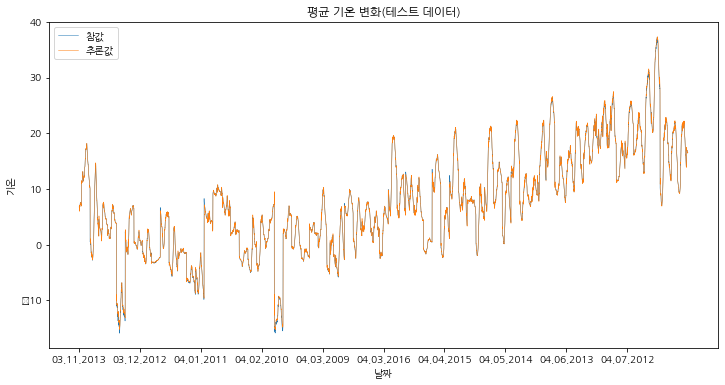

In [11]:
# 검증데이터의 추론 결과

fig = plt.figure(figsize = (12,6)) # 그래프의 크기를 (12,6)으로 설정합니다.
result = np.array(model(test_x)[:,0,:]).reshape(-1) # 그래프에 결과를 표시할 수 있도록 output의 첫번째 결과를 뽑아옵니다.
target = test_y[:,0,:].reshape(-1) # 참값의 그래프를 그리기 위해 label의 첫번째 값을 뽑아옵니다.
plt.plot(target, linewidth = 0.5)
plt.plot(result, linewidth = 0.5)
plt.title('평균 기온 변화(테스트 데이터)')
plt.legend(['참값', '추론값'])
plt.xlabel('날짜')
plt.ylabel('기온')
test_df = df[int(len(df)*0.8):]
plt.xticks(range(0, len(test_df), len(test_df)//10), labels = [test_df.iloc[x,0][:10] for x in range(0, len(test_df), len(test_df)//10)]) # x 축에 표시될 값을 설정합니다.
plt.show()